# Grid-local tripolar closure figures
### Author: Brandon Reichl
### Origination : October 2018

Required packages: netCDF4, numpy, matplotlib, cartopy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy as cart
from cartopy.util import add_cyclic_point
import netCDF4 as NC
%matplotlib inline

PRJCT = ccrs.NorthPolarStereo()

def ChartGreatCirclePath(X0,Y0,Th0):
    CG=30
    d2r=np.pi/180
    r2d=180/np.pi
    X=[X0]
    Y=[Y0]
    Th=[Th0]
    RE=6700000
    dt=10
    for ti in range(50000):
        X0=X[-1]
        Y0=Y[-1]
        Th0=Th[-1]
        Xdot = CG*np.sin(Th0*d2r) * (RE*np.cos(Y0*d2r))**(-1)*r2d
        Ydot = CG*np.cos(Th0*d2r) * (RE)**(-1)*r2d
        if (Y[-1]+Ydot*dt)>90:
            Y.append(180-(Y0+Ydot*dt))
            Th0=Th0-180;
            X.append(X0+Xdot*dt-180)
        elif (Y0+Ydot*dt)<-90:
            Y.append(-180-(Y0+Ydot*dt))
            Th0=Th0+180;
            X.append(X0+Xdot*dt+180)
        else:    
            Y.append(Y0+Ydot*dt)
            X.append(X0+Xdot*dt)

        if X[-1]>180:
            X[-1]-=360
        Th.append(Th0+CG * np.sin(Th0*d2r) * np.tan(Y0*d2r) / RE *dt*r2d);
    return X,Y,Th
        

/home/bgr/miniconda3/envs/Basemap/lib/python3.7/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


Text(230, 80, 'maxHS=0.80')

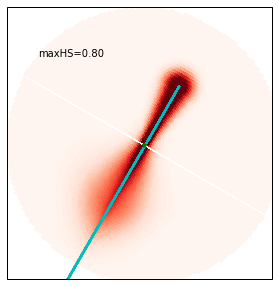

In [2]:
HNDL=NC.Dataset('../work/ww3.194801.nc')

Xgc,Ygc,Thgc=ChartGreatCirclePath(150.,85.,0.)


X0=np.array(HNDL['longitude'][:,:])
Y0=np.array(HNDL['latitude'][:,:])
HS = np.array(HNDL['hs'][:,:,:])
HS[HS>100]=np.NaN

bounds=np.arange(0,0.5,0.01)
norm = colors.BoundaryNorm(boundaries=bounds,ncolors=256)

fig=plt.figure(1,figsize=(5,5))
ax1 = plt.subplot(1,1,1,projection=PRJCT)
ax1.set_extent([-180, 180, 80, 90], crs=ccrs.PlateCarree())
HSSwath1=np.max(HS,axis=0)
CS1 = ax1.pcolormesh(X0[:,:],Y0[:,:],HSSwath1,cmap='Reds',vmin=np.min(bounds),vmax=np.max(bounds),
                       transform=ccrs.PlateCarree(),zorder=0,norm=norm)
CS1.cmap.set_under('white')
ax1.plot(Xgc,Ygc,'c.',markersize=1,transform=ccrs.PlateCarree())
ax1.plot(0,90,'g*',markersize=5,transform=ccrs.PlateCarree())
plt.tight_layout()
plt.text(230,80,'maxHS={:3.2f}'.format(np.nanmax(HSSwath1)),transform=ccrs.PlateCarree())